In [832]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.xls')

In [833]:
cacao

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [834]:
#select numeric columns only 
cacao.select_dtypes('number').shape

(1795, 4)

In [835]:
#select string columns only 
print(cacao.select_dtypes('object').shape)
cacao.select_dtypes('object')

(1795, 6)


,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,,Sao Tome
1,A. Morin,Kpime,70%,France,,Togo
2,A. Morin,Atsane,670%,France,,Togo
3,A. Morin,Akata,70%,France,,Togo
4,A. Morin,Quilla,70%,France,,Peru
...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,,Peru
1791,Zotter,Congo,65%,Austria,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,Forastero,India
1793,Zotter,Kerala State,62%,Austria,,India


In [836]:
cacao.columns = ['bar_id','company','specific_origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','broad_origin']

In [837]:
cacao.columns

Index(['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

In [838]:
cacao.bar_id.nunique()

1795

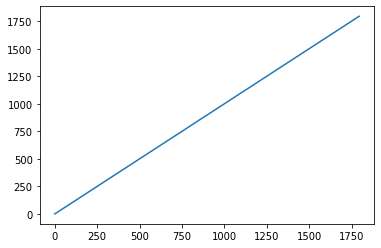

In [839]:
#это столбец индексов батончиков, количество уникальных значений соответствует количеству строк. Вряд ли он пригодится для дальнейшего анализа, удалим его.
plt.plot(cacao.bar_id)

In [840]:
cacao.drop(['bar_id'], inplace = True, axis=1)

In [841]:
cacao

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [842]:
cacao.company.nunique()

408

In [843]:
#407 unique companies 
pd.DataFrame(cacao.company.value_counts())


,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
ENNA,1
Chocolate Conspiracy,1
Oialla by Bojessen (Malmo),1
Two Ravens,1


In [844]:
#remove blank rows
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [845]:
cacao.company.value_counts()

Soma                                45
Bonnat                              26
Fresco                              26
Pralus                              25
Domori                              22
                                    ..
ENNA                                 1
Artisan du Chocolat (Casa Luker)     1
Chocolate Conspiracy                 1
Two Ravens                           1
Anahata                              1
Name: company, Length: 407, dtype: int64

In [846]:
companies = cacao.company.value_counts()
companies = pd.DataFrame(companies)
companies

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
...,...
ENNA,1
Artisan du Chocolat (Casa Luker),1
Chocolate Conspiracy,1
Two Ravens,1


In [847]:
#компаний, у которых в рейтинге больше 10 батончиков, всего 30
companies[companies>10].dropna().size

30

In [848]:
(cacao.company.value_counts()>10).sum()

30

In [849]:
#1012 unique origins, bcs minus empty string
cacao.specific_origin.value_counts()

                                 58
Madagascar                       55
Peru                             44
Ecuador                          39
Dominican Republic               33
                                 ..
Nativo, Varzea                    1
Cooproagro                        1
Autumn, Primary Harvest, 2012     1
Porcelana, Pariguan               1
Dominican Republic, lot D82R      1
Name: specific_origin, Length: 1013, dtype: int64

In [850]:
#Сколько значений, встретившихся в столбце более 10 раз? 15 значений minus empty string
(cacao.specific_origin.value_counts()>10).head(20)

                       True
Madagascar             True
Peru                   True
Ecuador                True
Dominican Republic     True
Venezuela              True
Chuao                  True
Sambirano              True
Ocumare                True
Papua New Guinea       True
Ghana                  True
Belize                 True
Bolivia                True
Tanzania               True
Brazil                 True
La Red                 True
Trinidad              False
Porcelana             False
Costa Rica            False
Maya Mountain         False
Name: specific_origin, dtype: bool

<AxesSubplot:>

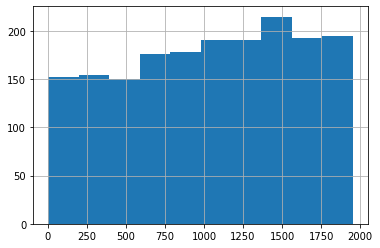

In [851]:
# bcs ref column is numeric and doesn't have missing values let's look more into it
#REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
cacao.ref.hist()

In [852]:
#Как видно, у этого признака распределение без аномалий, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?
cacao.ref.describe()

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

<AxesSubplot:>

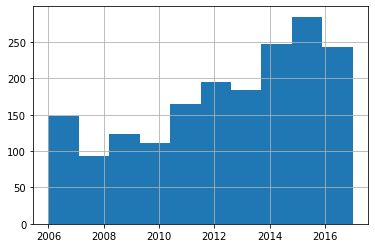

In [853]:
# review_date is also numeric and doesn't have any missing values
cacao.review_date.hist()

In [854]:
cacao.review_date.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

In [855]:
#cacao.review_date не содержиот выбросы. Как мы это выяснили? 

In [856]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [857]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%','')))

In [858]:
cacao.cocoa_percent

0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent, Length: 1795, dtype: float64

<AxesSubplot:>

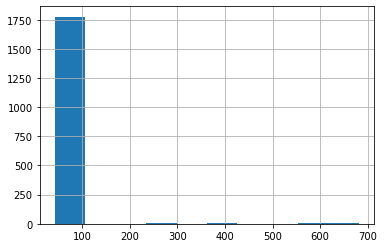

In [859]:
#посмотрим распределение признака 
cacao.cocoa_percent.hist()

Видим, что основное распределение лежит между \(0\) и \(100\) процентами и есть потенциальные выбросы свыше \(100\)% (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

In [860]:
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
 

In [861]:
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


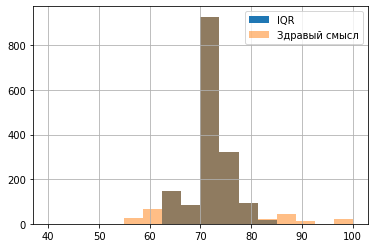

In [862]:
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')

cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
plt.legend();

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка. К сожалению, такое случается нередко.

<AxesSubplot:>

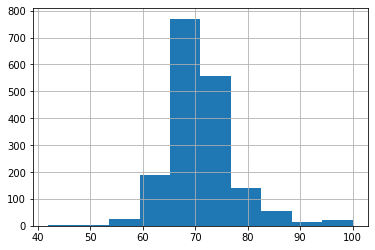

In [863]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]
cacao.cocoa_percent.hist()

In [864]:
cacao.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [865]:
display(cacao.company_location.value_counts())

U.S.A.            756
France            155
Canada            124
U.K.               94
Italy              63
                 ... 
Czech Republic      1
Eucador             1
Niacragua           1
India               1
Martinique          1
Name: company_location, Length: 60, dtype: int64

In [866]:
pd.isna(cacao.company_location).value_counts()

False    1776
Name: company_location, dtype: int64

In [867]:
locations = pd.DataFrame(cacao.company_location.value_counts())
locations

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Czech Republic,1
Eucador,1
Niacragua,1
India,1


In [868]:
locations[locations.company_location > 10]

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
Ecuador,54
Australia,49
Belgium,39
Switzerland,38
Germany,35


In [869]:
locations[locations.company_location > 10].size

22

In [870]:
(cacao.company_location.value_counts()>10).sum()

22

Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.

In [871]:
rat = cacao.rating

In [872]:
pd.isna(rat).value_counts()

False    1776
Name: rating, dtype: int64

In [873]:
rat[rat == '']

Series([], Name: rating, dtype: float64)

<AxesSubplot:>

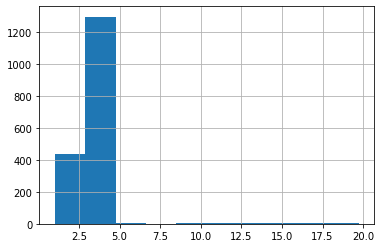

In [874]:
cacao.rating.hist()

In [875]:
cacao.rating.describe()

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

Скорее всего была использована пятибалльная шкала оценивания
В данных есть выбросы.

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


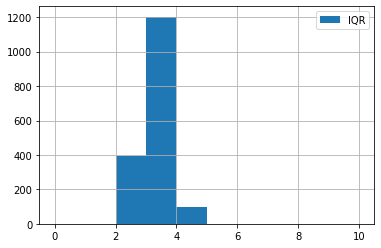

In [876]:
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [877]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

<AxesSubplot:>

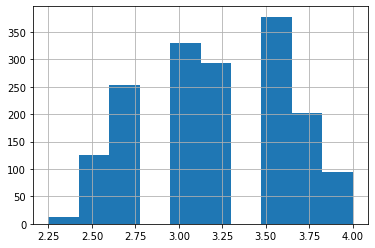

In [878]:
cacao.rating.hist()

In [879]:
cacao.bean_type.value_counts()

                            829
Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
Matina                        3
Beniano                       3
Nacional (Arriba)             3
EET                           3
Forastero (Catongo)           2
Criollo, Forastero            2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Criollo (Ocumare 61)          2
Nacional                      2
Criollo (Amarru)              2
Trinitario, Forastero         2
Amazon mix                    2
Criollo (Wild)                1
Amazon                        1
Trinitario, TCGA              1
Criollo (Ocumare)             1
Trinitario, Nacional          1
Trinitario (Scavina)          1
CCN51   

In [880]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [881]:
display(cacao.bean_type.value_counts())

Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
Beniano                       3
Nacional (Arriba)             3
Matina                        3
EET                           3
Criollo, Forastero            2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Criollo (Ocumare 61)          2
Nacional                      2
Trinitario, Forastero         2
Criollo (Amarru)              2
Amazon mix                    2
Trinitario, Nacional          1
Criollo (Wild)                1
Amazon                        1
Trinitario, TCGA              1
Criollo (Ocumare)             1
nan                           1
Trinitario (Scavina)          1
CCN51   

In [882]:
(cacao.bean_type.value_counts()>10).sum()

7

In [883]:
cacao.bean_type.nunique()

41

In [884]:
(pd.DataFrame(cacao.bean_type)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [885]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [886]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Beniano,3
Matina,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


### broad_origin

In [831]:
cacao.broad_origin.nunique()

21

In [826]:
(cacao.broad_origin.value_counts()>10).sum()

25

In [887]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [888]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
...,...
"Venezuela, Ghana",1
"Venez,Africa,Brasil,Peru,Mex",1
"Ven., Trinidad, Mad.",1
"Ecuador, Costa Rica",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [891]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries)

In [892]:
cacao.broad_origin.nunique()

94

### Корреляционный анализ
Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

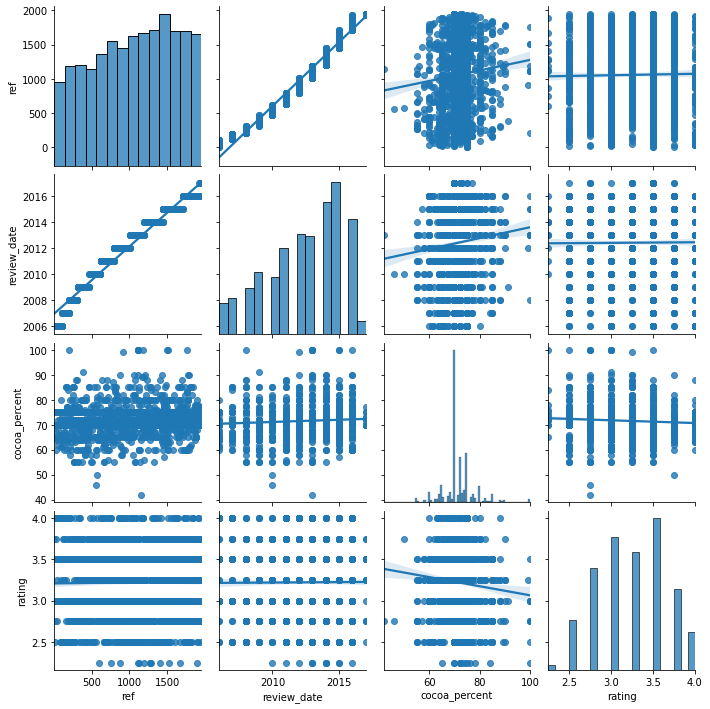

In [893]:
sns.pairplot(cacao, kind = 'reg')

Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [894]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

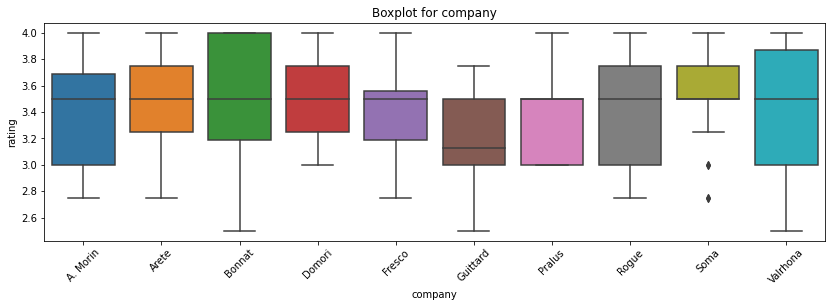

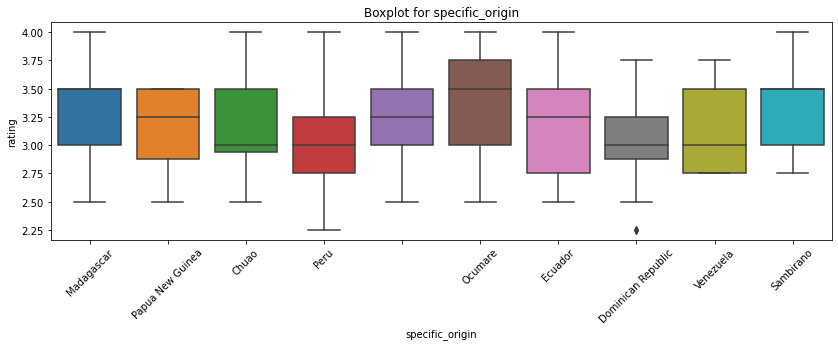

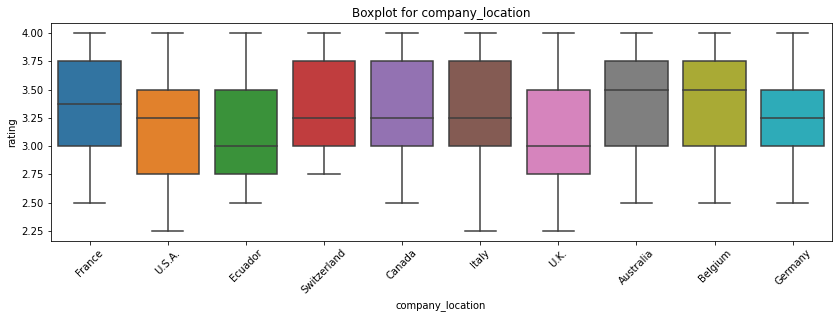

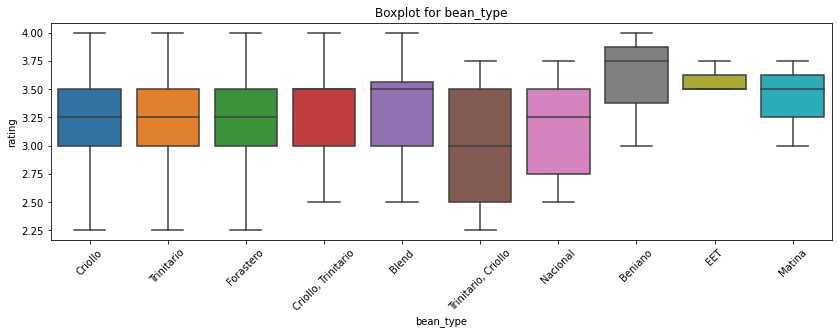

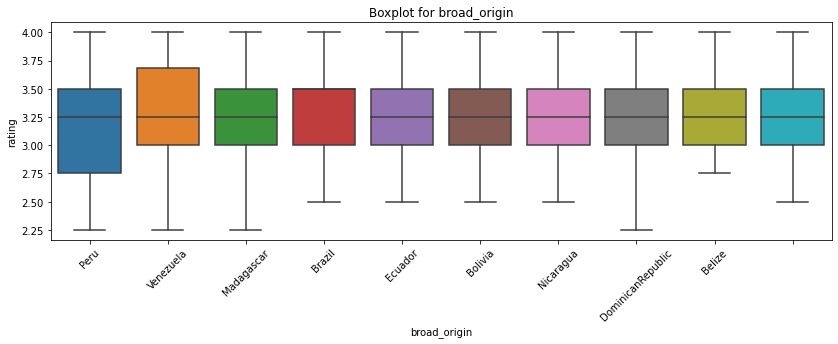

In [895]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [896]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [897]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [898]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


### Выводы

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.